Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

Loading data

In [4]:
df = pd.read_csv('datasets\Clean_Dataset.csv',index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


EDA

In [11]:
df.shape

(300153, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [13]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [14]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
features = df.drop('price', axis=1)
label = df['price']

In [16]:
features.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [22]:
#Airline distribution
airline_distribution = df['airline'].value_counts()
airlines = df['airline'].unique()
print("Number of flights per airline:")
print(airline_distribution)

Number of flights per airline:
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


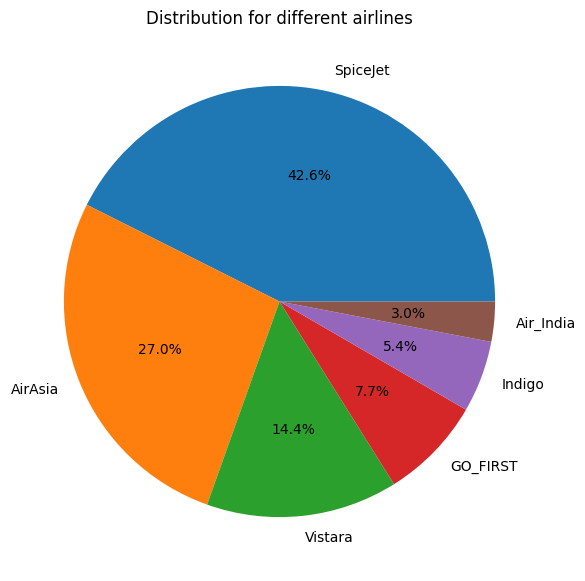

In [22]:
# making a pie chart for visual representation of class distribution
plt.figure(figsize=(7, 7))
plt.pie(airline_distribution, labels=airlines, autopct="%1.1f%%")
plt.title("Distribution for different airlines")
plt.show()

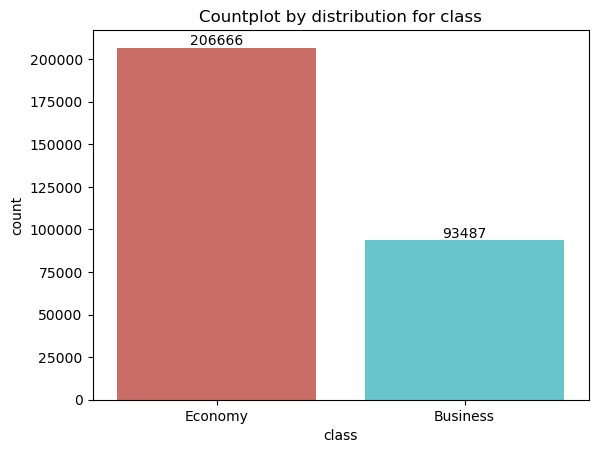

In [18]:
ax = sns.countplot(x=df['class'], data=df, palette='hls')
ax.bar_label(ax.containers[0])
plt.title('Countplot by distribution for class')
plt.show()

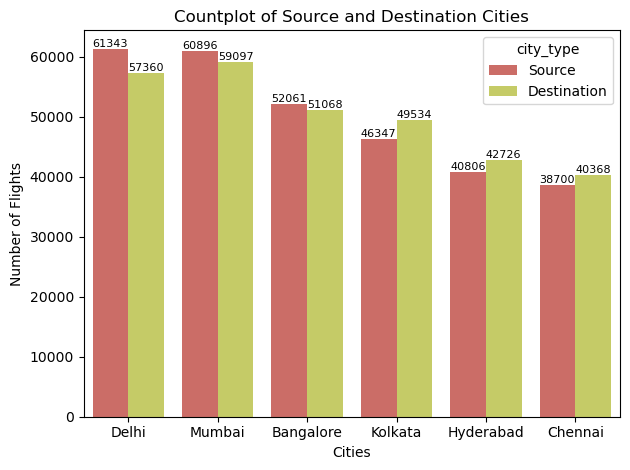

In [47]:
# Count flights for source and destination cities
source_counts = df['source_city'].value_counts().reset_index()
source_counts.columns = ['city', 'count']
source_counts['city_type'] = 'Source'

dest_counts = df['destination_city'].value_counts().reset_index()
dest_counts.columns = ['city', 'count']
dest_counts['city_type'] = 'Destination'


combined_counts = pd.concat([source_counts, dest_counts], ignore_index=True)
palette = sns.color_palette('hls', len(combined_counts['city'].unique()))

ax = sns.barplot(x='city', y='count', hue='city_type', data=combined_counts, palette=palette)

plt.title('Countplot of Source and Destination Cities')
plt.xlabel('Cities')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container,fontsize=8)

plt.tight_layout()
plt.show()


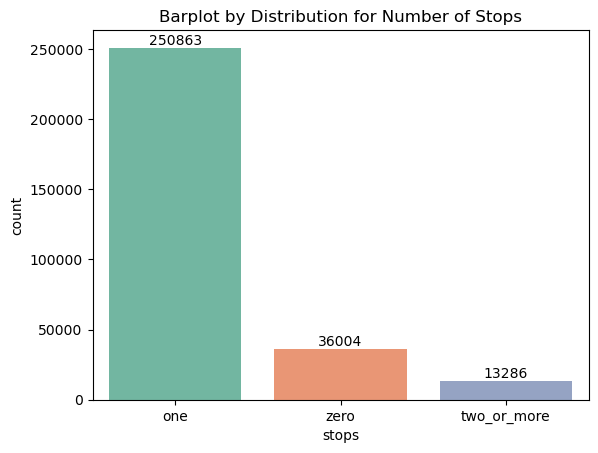

In [21]:
#Calculate the count of each category in 'stops'
stops_count = df['stops'].value_counts().reset_index()
stops_count.columns = ['stops', 'count']

#Creating barplot
ax = sns.barplot(x='stops', y='count', data=stops_count, palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.title('Barplot by Distribution for Number of Stops')
plt.show()


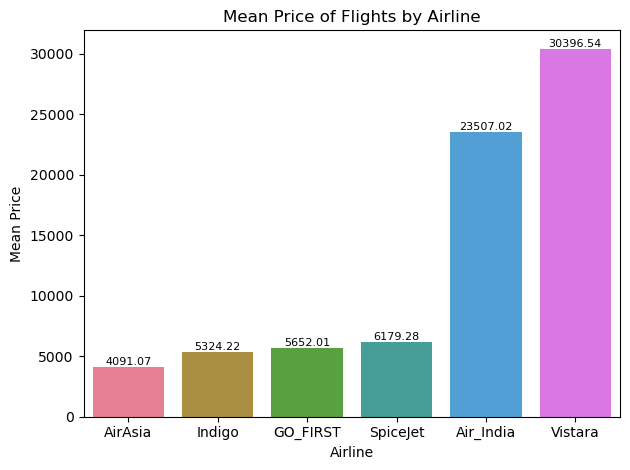

In [46]:
mean_price = df.groupby('airline')['price'].mean().reset_index()
mean_price = mean_price.sort_values(by='price',ascending = True)
ax = sns.barplot(x='airline', y='price', data=mean_price,palette = 'husl')

plt.title('Mean Price of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Price')

ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=8)  
plt.tight_layout()
plt.show()



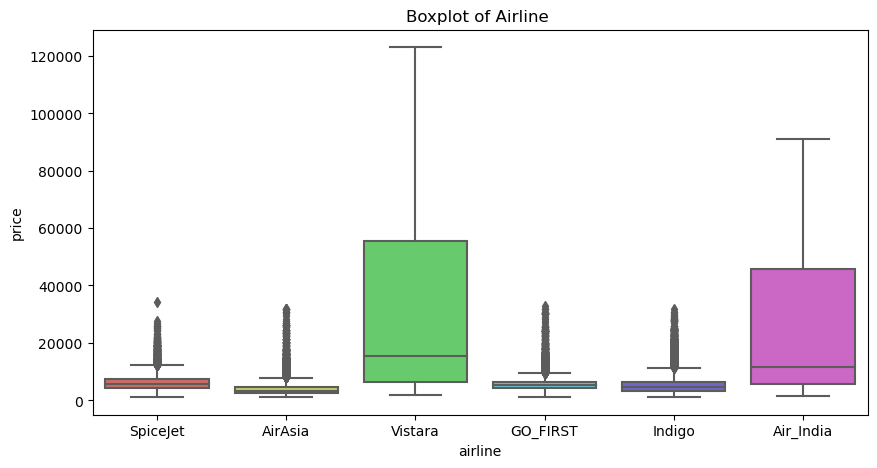

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['airline'], y="price", data=df, palette = 'hls')
plt.title(f'Boxplot of Airline ')
plt.show()


In [48]:
price_summary = df.groupby('airline')['price'].agg(['min', 'max', 'mean', 'median']).reset_index()
price_summary.columns = ['Airline', 'Min Price', 'Max Price', 'Mean Price', 'Median Price']
price_summary


,Airline,Min Price,Max Price,Mean Price,Median Price
0,AirAsia,1105,31917,4091.072742,3276.0
1,Air_India,1526,90970,23507.019112,11520.0
2,GO_FIRST,1105,32803,5652.007595,5336.0
3,Indigo,1105,31952,5324.216303,4453.0
4,SpiceJet,1106,34158,6179.278881,5654.0
5,Vistara,1714,123071,30396.536302,15543.0


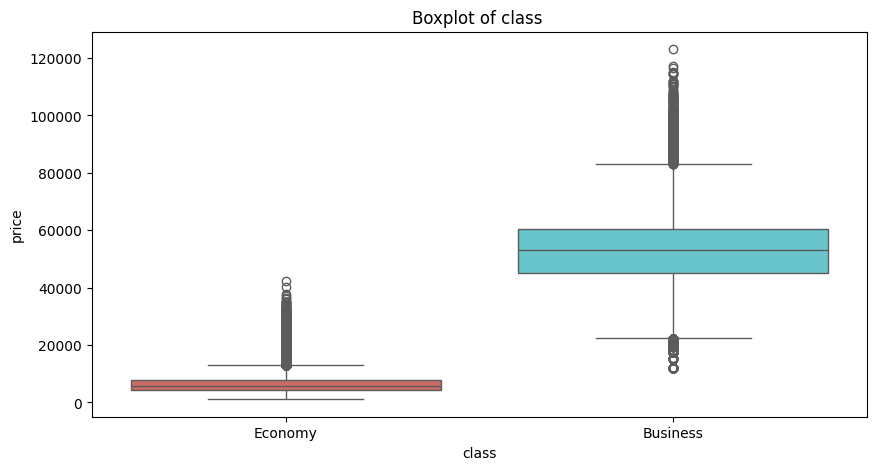

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['class'], y="price", data=df, palette = 'hls')
plt.title(f'Boxplot of class ')
plt.show()

In [50]:
class_price_summary = df.groupby('class')['price'].agg(['min', 'max', 'mean', 'median']).reset_index()
class_price_summary.columns = ['Class', 'Min Price', 'Max Price', 'Mean Price', 'Median Price']
class_price_summary


,Class,Min Price,Max Price,Mean Price,Median Price
0,Business,12000,123071,52540.081124,53164.0
1,Economy,1105,42349,6572.342383,5772.0


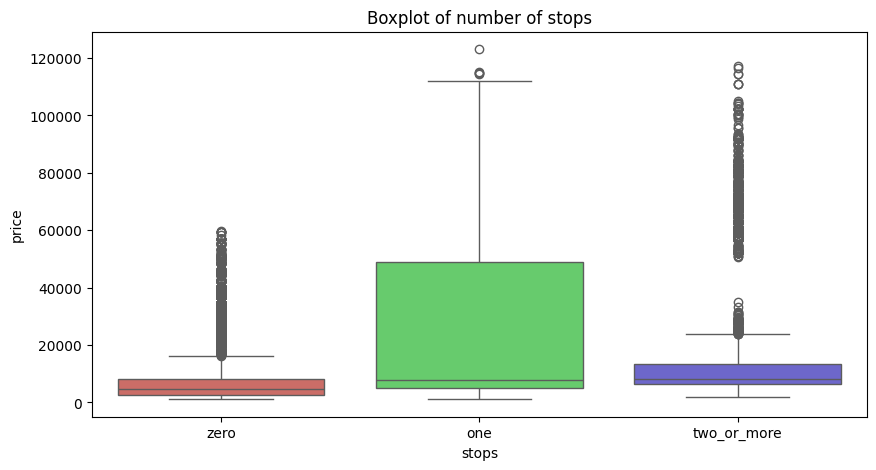

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['stops'], y="price", data=df, palette = 'hls')
plt.title(f'Boxplot of number of stops')
plt.show()

In [51]:
stops_price_summary = df.groupby('stops')['price'].agg(['min', 'max', 'mean', 'median']).reset_index()
stops_price_summary.columns = ['Stops', 'Min Price', 'Max Price', 'Mean Price', 'Median Price']
stops_price_summary

,Stops,Min Price,Max Price,Mean Price,Median Price
0,one,1105,123071,22900.992482,7959.0
1,two_or_more,1966,117307,14113.450775,8307.0
2,zero,1105,59573,9375.938535,4499.0


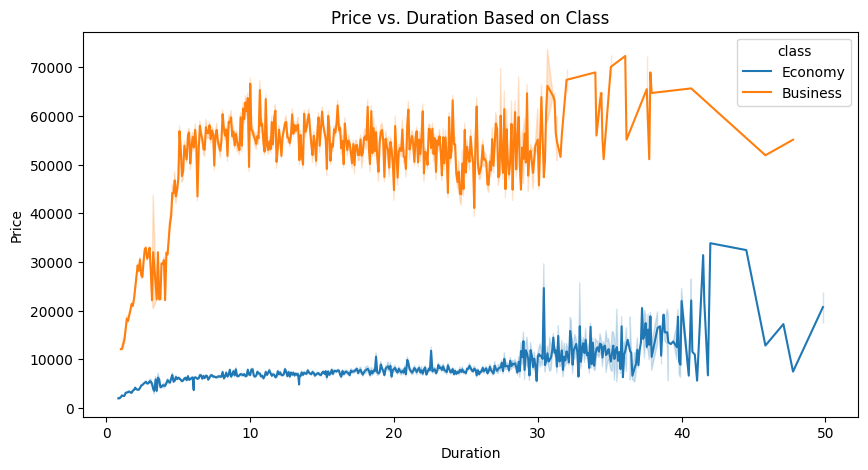

In [51]:
#Price vs Duration based on class
plt.figure(figsize=(10, 5))
sns.lineplot(x='duration', y='price', hue='class', data=df)
plt.title('Price vs. Duration Based on Class')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

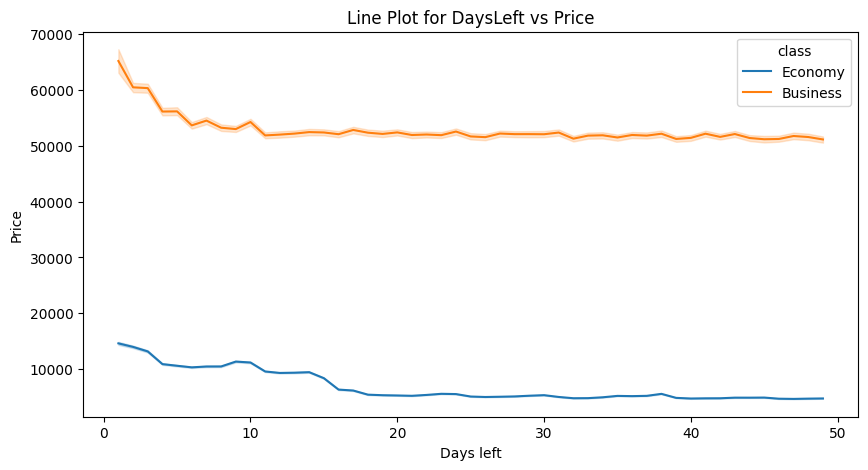

In [53]:
#DaysLeft vs Price based on class
plt.figure(figsize=(10, 5))
sns.lineplot(x='days_left', y='price', hue='class', data=df)
plt.title('Line Plot for DaysLeft vs Price')
plt.xlabel('Days left')
plt.ylabel('Price')
plt.show()

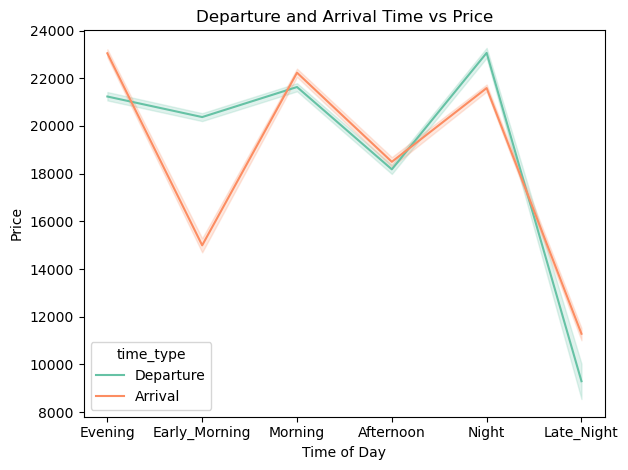

In [37]:
departure_data = df[['departure_time', 'price']].copy()
departure_data['time_type'] = 'Departure'

arrival_data = df[['arrival_time', 'price']].copy()
arrival_data.rename(columns={'arrival_time': 'departure_time'}, inplace=True)
arrival_data['time_type'] = 'Arrival'

combined_data = pd.concat([departure_data, arrival_data], ignore_index=True)
ax = sns.lineplot(x='departure_time', y='price', hue='time_type', data=combined_data, palette='Set2')

plt.title('Departure and Arrival Time vs Price')
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


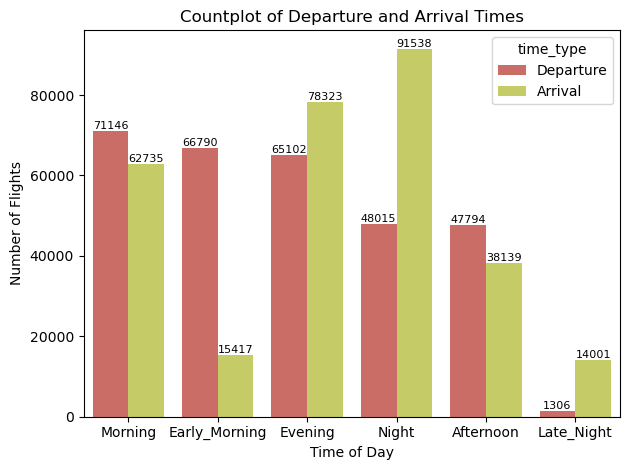

In [36]:
# Count flights for departure and arrival times
departure_counts = df['departure_time'].value_counts().reset_index()
departure_counts.columns = ['time', 'count']
departure_counts['time_type'] = 'Departure'

arrival_counts = df['arrival_time'].value_counts().reset_index()
arrival_counts.columns = ['time', 'count']
arrival_counts['time_type'] = 'Arrival'


combined_counts = pd.concat([departure_counts, arrival_counts], ignore_index=True)
palette = sns.color_palette('hls', len(combined_counts['time'].unique()))
ax = sns.barplot(x='time', y='count', hue='time_type', data=combined_counts, palette=palette)

plt.title('Countplot of Departure and Arrival Times')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=8) 

plt.tight_layout()
plt.show()


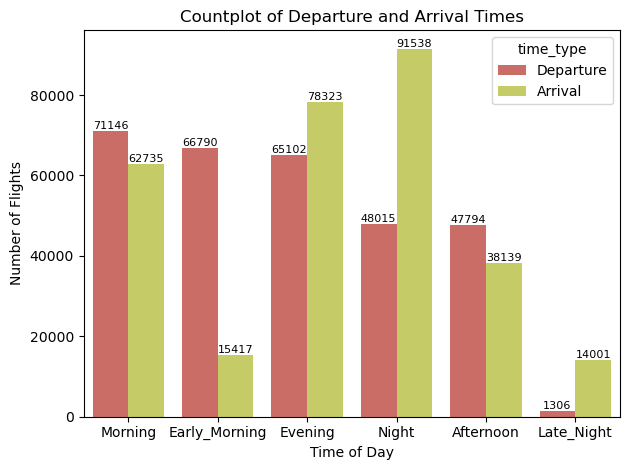

In [34]:
# Count flights for departure and arrival times
departure_counts = df['departure_time'].value_counts().reset_index()
departure_counts.columns = ['time', 'count']
departure_counts['time_type'] = 'Departure'

arrival_counts = df['arrival_time'].value_counts().reset_index()
arrival_counts.columns = ['time', 'count']
arrival_counts['time_type'] = 'Arrival'

combined_counts = pd.concat([departure_counts, arrival_counts], ignore_index=True)
palette = sns.color_palette('hls', len(combined_counts['time'].unique()))
ax = sns.barplot(x='time', y='count', hue='time_type', data=combined_counts, palette=palette)

plt.title('Countplot of Departure and Arrival Times')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=8) 


plt.tight_layout()
plt.show()


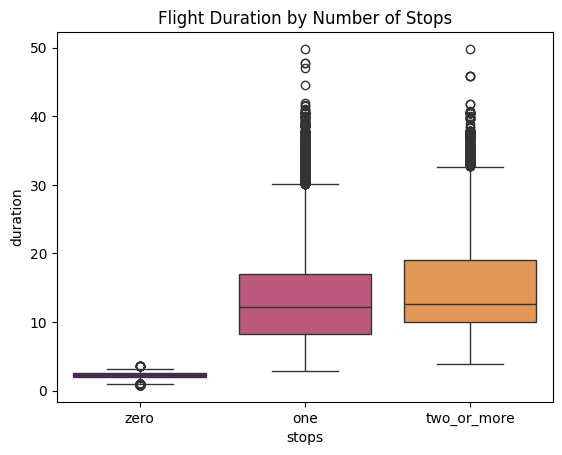

In [63]:
sns.boxplot(x='stops', y='duration', data=df, palette='plasma')
plt.title('Flight Duration by Number of Stops')
plt.show()